# **Task Two for GRIP - The Sparks Foundation**

### **Presented By**

>**SANJANA A**

### **This project is a unsupervised classification of data from the iris dataset.**


#### **Dataset link**
https://bit.ly/3kXTdox 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist



In [8]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## To determine the optimal number of clusters for K-means, we will use the elbow method

In [12]:
distortions = []
inertias = []
mapping1 = {} 
mapping2 = {} 
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(iris_df)
    kmeanModel.fit(iris_df)
 
    distortions.append(sum(np.min(cdist(iris_df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / iris_df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(iris_df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / iris_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

## Distortion obtained from the data

In [13]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.9440683605553906
2 : 0.8555777695266533
3 : 0.6480304904934434
4 : 0.5573847727333312
5 : 0.5096521951118286
6 : 0.46638775718623643
7 : 0.4357018345263182
8 : 0.4171910822407606
9 : 0.3956395245518018


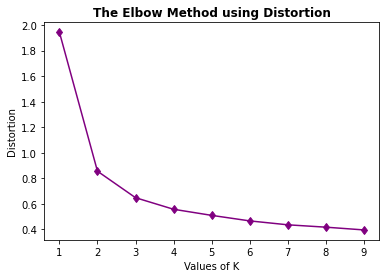

In [27]:
plt.plot(K, distortions, 'bd-', color = "purple")
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion', weight = "bold")
plt.show()

## Inertia obtained from the data


In [28]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 681.3705999999996
2 : 152.34795176035797
3 : 78.851441426146
4 : 57.22847321428572
5 : 46.44618205128204
6 : 39.05497786747789
7 : 34.29822966507179
8 : 30.330148841354735
9 : 27.98339097744362


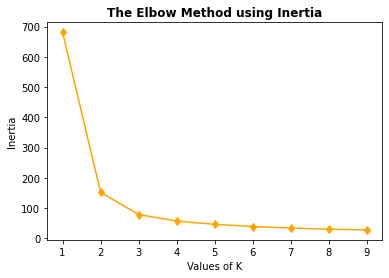

In [37]:
plt.plot(K, inertias, 'bd-', color = "orange")
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia', weight = "bold")
plt.show()

### From both cases of the elbow method, we come to conclusion that 3 is the optimal number of clusters for this dataset.

In [72]:
model = KMeans(n_clusters=3)
model = model.fit_predict(iris_df)

## Visualization of Kmeans for 3 clusters on Iris dataset

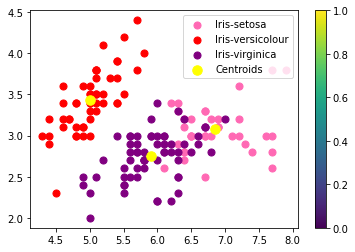

In [106]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],  s = 50, c = 'hotpink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'purple', label = 'Iris-virginica')

plt.scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:,1],  s = 90, c = 'yellow', label = 'Centroids')
plt.colorbar()
plt.legend()
